Данные с различными показателями по странам с 1980 по 2009 тут. Показатели, которые есть в таблице

'Country or Area' - страна

'Year' - год

'Life expectancy' - продолжительность жизни

'GDP' - ВВП

'Wage' - средняя заработная плата.

Необходимо определить страну, в которой в 1998 году ВВП был ниже 1500.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('country_statistics.csv')

In [3]:
data.head()

,Country or Area,Life expectancy,Year,Child overweight percent,Child underweight percent,GDP,Literacy,Wage
0,Afghanistan,41.0,1985,NaN,NaN,3322.0,4.99%,NaN
1,Afghanistan,41.0,1990,NaN,NaN,3622.0,4.99%,NaN
2,Albania,72.0,1985,NaN,NaN,2339.0,NaN,NaN
3,Albania,72.0,1990,NaN,NaN,2221.0,NaN,NaN
4,Algeria,66.0,1985,NaN,NaN,61132.0,NaN,NaN


In [7]:
data_1998 = data[data['Year'] == 1998]

In [9]:
answer = data_1998[data_1998['GDP'] < 1500]

In [10]:
answer

,Country or Area,Life expectancy,Year,Child overweight percent,Child underweight percent,GDP,Literacy,Wage
1397,Maldives,NaN,1998,6.9,42.066667,693.0,96.44%,NaN


__Ответ:__ Maldives

In [13]:
from sklearn import metrics

/home/philipp/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


Вам предложены данные с информацией по квартирам, выставленным на продажу.
1) Откройте файл. Сколько всего представлено квартир?

Ответ 30471



Найдите меры центральной тенденции и разброса для признака "Общая площадь квартиры"(переменная full_sq). Все показатели округлите до сотых. Если число целое, введите его без знаков после запятой.

Среднее арифметическое: Ответ 54.21

Медиана: Ответ 49

Стандартное отклонение: Ответ 38.03

Межквартильный размах: Ответ 25

2) Оставьте в датасете только следующие признаки:

-price_doc (цена)

-sub_area (район)

-full_sq(общая площадь)

-floor(этаж)

-children_preschool (детские сады)

-children_school (школы)

-additional_education_km (расстояние до учреждений доп.образования)

-public_transport_station_min_walk (минут пешком до общественного транспорта)

-mkad_km (КМ до МКАДа)

-kremlin_km (КМ до Кремля)

-ecology (уровень экологии)



Датасет собран для прогнозирования стоимости квартиры по ее признакам. Обратите внимание, что вам самостоятельно нужно определить, какая колонка отвечает за целевую переменную, какие - за признаки.



2) Постройте матрицу корреляций для количественных признаков квартир. Между какими признаками самая высокая корреляция? Введите названия признаков в алфавитном порядке.

Введите название первого признака:

Ответ additional_education_km


Введите название второго признака:

Ответ public_transport_station_min_walk


3) Отберите 3 количественных признака, с которыми у целевой переменной самая сильная взаимосвязь. Перечислите их в ячейках ниже в алфавитном порядке.


Введите название первого признака:

Ответ additional_education_km

Введите название второго признака:

Ответ full_sq

Введите название третьего признака:

Ответ kremlin_min

In [30]:
sber = pd.read_csv('sberbank_moscow_1.csv')

In [31]:
sber.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [32]:
len(sber)

30471

In [33]:
sber['full_sq'].mean()

54.21426930524105

In [34]:
sber['full_sq'].median()

49.0

In [35]:
sber['full_sq'].std()

38.031487324105015

In [36]:
sber['full_sq'].quantile([.25, .75])


0.25    38.0
0.75    63.0
Name: full_sq, dtype: float64

In [37]:
63 - 38

25

In [38]:
columns = ['price_doc', 'sub_area', 'full_sq', 'floor', 'children_preschool', 'children_school', \
           'additional_education_km', 'public_transport_station_min_walk', 'mkad_km', 'kremlin_km', 'ecology']
sber = sber[columns]

In [39]:
sber.head()

,price_doc,sub_area,full_sq,floor,children_preschool,children_school,additional_education_km,public_transport_station_min_walk,mkad_km,kremlin_km,ecology
0,5850000,Bibirevo,43,4.0,9576,10309,0.947962,3.299822,1.422391,15.156211,good
1,6000000,Nagatinskij Zaton,34,3.0,6880,7759,1.072315,0.783160,9.503405,8.698054,excellent
2,5700000,Tekstil'shhiki,43,2.0,5879,6207,0.391957,3.945073,5.604800,9.067885,poor
3,13100000,Mitino,89,9.0,13087,13670,0.892674,1.579164,2.677824,19.487005,good
4,16331452,Basmannoe,77,4.0,5706,6748,0.810801,0.857764,11.616653,2.578671,excellent


In [42]:
num_features = ['price_doc', 'full_sq', 'floor', 'children_preschool', 'children_school', \
           'additional_education_km', 'public_transport_station_min_walk', 'mkad_km', 'kremlin_km']

In [43]:
import seaborn as sns

In [44]:
sber_num = sber[num_features]

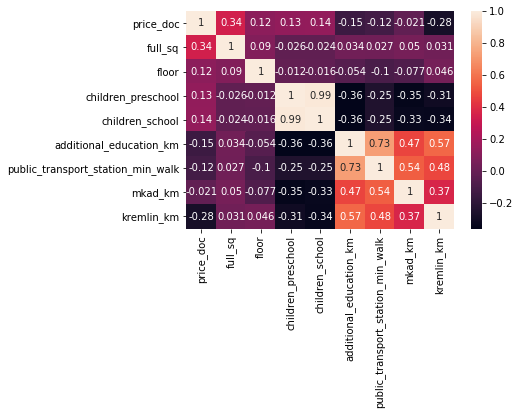

In [46]:
x = sns.heatmap(sber_num.corr(), annot=True)

public_transport_station_min_walk, additional_education_km

price_doc - целевая переменная

full_sq, kremlin_min, additional_education_km